# Mushroom Project

## Problem Statement:

### Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like 'leaflets three, let it be' for Poisonous Oak and Ivy.

Thus, in this project, you have to predict the "Class" column. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.columns.T

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# Inspect the unique values in each column
# they are entirely one letter data

for column in df.columns:
    print('Unique values in', column+':', df[column].unique())

Unique values in class: ['p' 'e']
Unique values in cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in cap-surface: ['s' 'y' 'f' 'g']
Unique values in cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in bruises: ['t' 'f']
Unique values in odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in gill-attachment: ['f' 'a']
Unique values in gill-spacing: ['c' 'w']
Unique values in gill-size: ['n' 'b']
Unique values in gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in stalk-shape: ['e' 't']
Unique values in stalk-root: ['e' 'c' 'b' 'r' '?']
Unique values in stalk-surface-above-ring: ['s' 'f' 'k' 'y']
Unique values in stalk-surface-below-ring: ['s' 'f' 'y' 'k']
Unique values in stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in veil-type: ['p']
Unique values in veil-color: ['w' 'n' 'o' 'y']
Unique values in ring-number: ['o' 't' 'n']

## EDA

<function matplotlib.pyplot.show(close=None, block=None)>

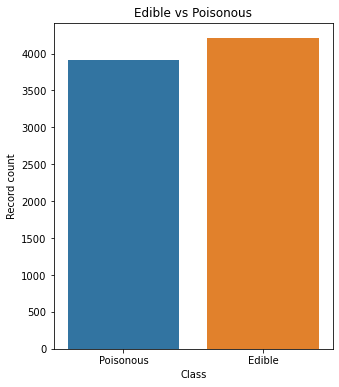

In [7]:
#target variable countplot

fig, ax = plt.subplots(figsize=(5,6))
fig1 = sns.countplot(df['class'])
plt.title('Edible vs Poisonous')
plt.ylabel('Record count')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous','Edible'])
plt.show

* Data is almost balanced

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

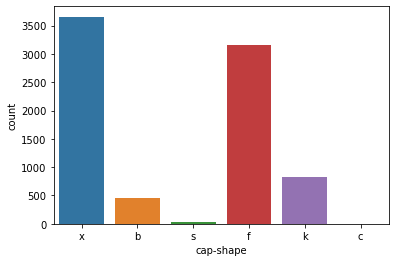

In [8]:
sns.countplot(data=df,x='cap-shape')

AxesSubplot(0.125,0.125;0.775x0.755)
cap-shape  class
b          e         404
           p          48
c          p           4
f          e        1596
           p        1556
k          p         600
           e         228
s          e          32
x          e        1948
           p        1708
Name: class, dtype: int64


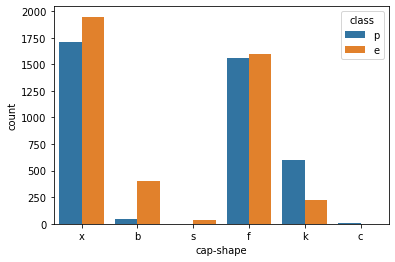

In [9]:
print(sns.countplot(data=df,x='cap-shape',hue='class'))

print(df.groupby('cap-shape')['class'].value_counts())

#### Here we can clearly see,
* all c shape mushrooms are poisonous.
* all s shape mushrooms are edible.

<AxesSubplot:xlabel='cap-surface', ylabel='count'>

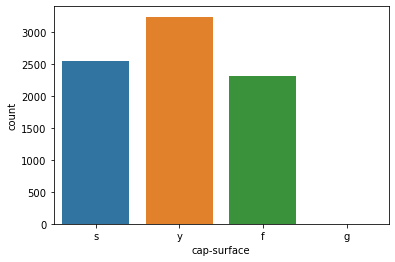

In [10]:
sns.countplot(data=df,x='cap-surface')

cap-surface  class
f            e        1560
             p         760
g            p           4
s            p        1412
             e        1144
y            p        1740
             e        1504
Name: class, dtype: int64


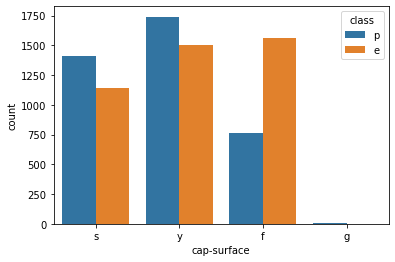

In [11]:
sns.countplot(data=df,x='cap-surface',hue='class')
print(df.groupby('cap-surface')['class'].value_counts())

#### Here we can clearly see:
* All mushroom which having g-surface are poisonous 

<AxesSubplot:xlabel='cap-color', ylabel='count'>

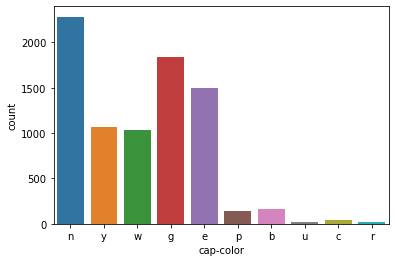

In [12]:
sns.countplot(data=df, x='cap-color')

AxesSubplot(0.125,0.125;0.775x0.755)
cap-color  class
b          p         120
           e          48
c          e          32
           p          12
e          p         876
           e         624
g          e        1032
           p         808
n          e        1264
           p        1020
p          p          88
           e          56
r          e          16
u          e          16
w          e         720
           p         320
y          p         672
           e         400
Name: class, dtype: int64


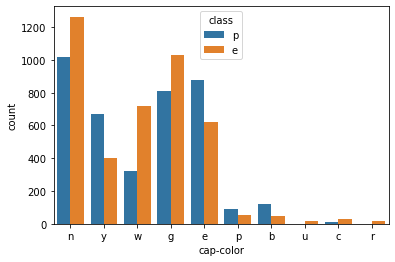

In [13]:
print(sns.countplot(data=df, x='cap-color',hue = 'class'))

print(df.groupby('cap-color')['class'].value_counts())

#### Here we can clearly see:
* All r and u colored mushrooms are edible.

AxesSubplot(0.125,0.125;0.775x0.755)
bruises  class
f        p        3292
         e        1456
t        e        2752
         p         624
Name: class, dtype: int64


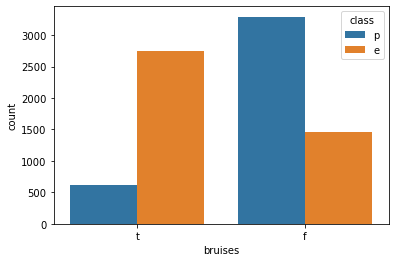

In [14]:
print(sns.countplot(data=df, x='bruises',hue = 'class'))

print(df.groupby('bruises')['class'].value_counts())

* Can't conclude anything.

<AxesSubplot:xlabel='odor', ylabel='count'>

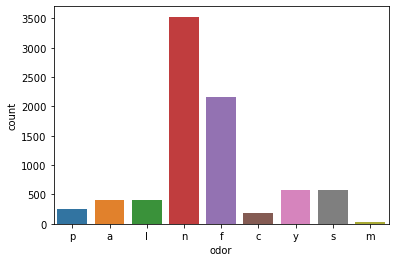

In [15]:
sns.countplot(data=df,x='odor')

odor  class
a     e         400
c     p         192
f     p        2160
l     e         400
m     p          36
n     e        3408
      p         120
p     p         256
s     p         576
y     p         576
Name: class, dtype: int64


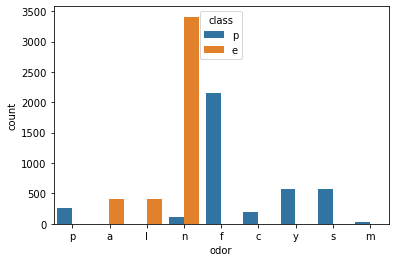

In [16]:
sns.countplot(data=df, x='odor',hue = 'class')
print(df.groupby('odor')['class'].value_counts())

#### Here we can clearly see:
* c, f, m, p, s, y smelling mushrooms are poisnous.
* a & l smelling mushrooms are edible.

<AxesSubplot:xlabel='gill-attachment', ylabel='count'>

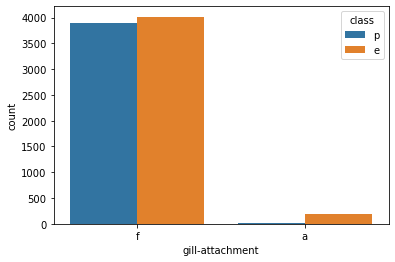

In [17]:
sns.countplot(data=df, x='gill-attachment',hue = 'class')

* Can't conclude anything.

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

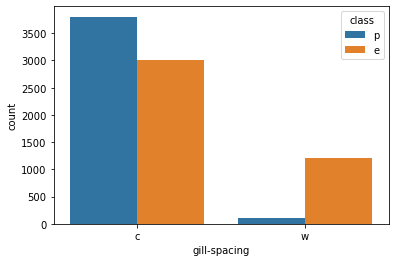

In [18]:
sns.countplot(data=df, x='gill-spacing',hue = 'class')

* Can't conclude anything.

<AxesSubplot:xlabel='gill-size', ylabel='count'>

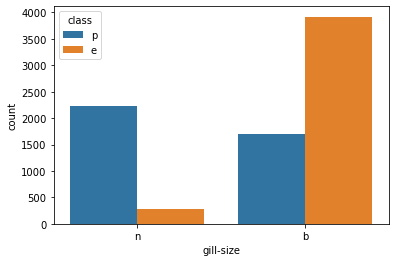

In [19]:
sns.countplot(data=df, x='gill-size',hue = 'class')

* Can't conclude anything.

<AxesSubplot:xlabel='gill-color', ylabel='count'>

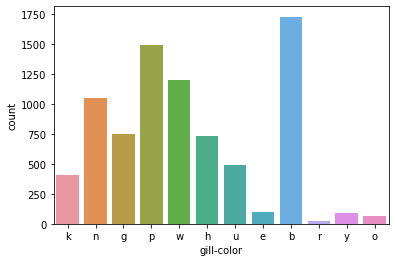

In [20]:
sns.countplot(data=df, x='gill-color')

gill-color  class
b           p        1728
e           e          96
g           p         504
            e         248
h           p         528
            e         204
k           e         344
            p          64
n           e         936
            p         112
o           e          64
p           e         852
            p         640
r           p          24
u           e         444
            p          48
w           e         956
            p         246
y           e          64
            p          22
Name: class, dtype: int64


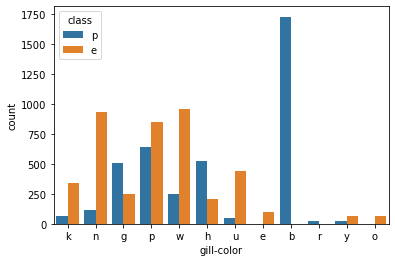

In [21]:
sns.countplot(data=df, x='gill-color',hue = 'class')
print(df.groupby('gill-color')['class'].value_counts())

#### Here we can clearly see:
* All mushrooms which having b & r color gills are poisnous.
* All mushrooms which having e & o color gills are edible.

## Data Preprocessing

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [23]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder() # converting category to numerical values

for i in df.columns:
    df[i] = enc.fit_transform(df[i])

In [24]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,1,2


<function matplotlib.pyplot.show(close=None, block=None)>

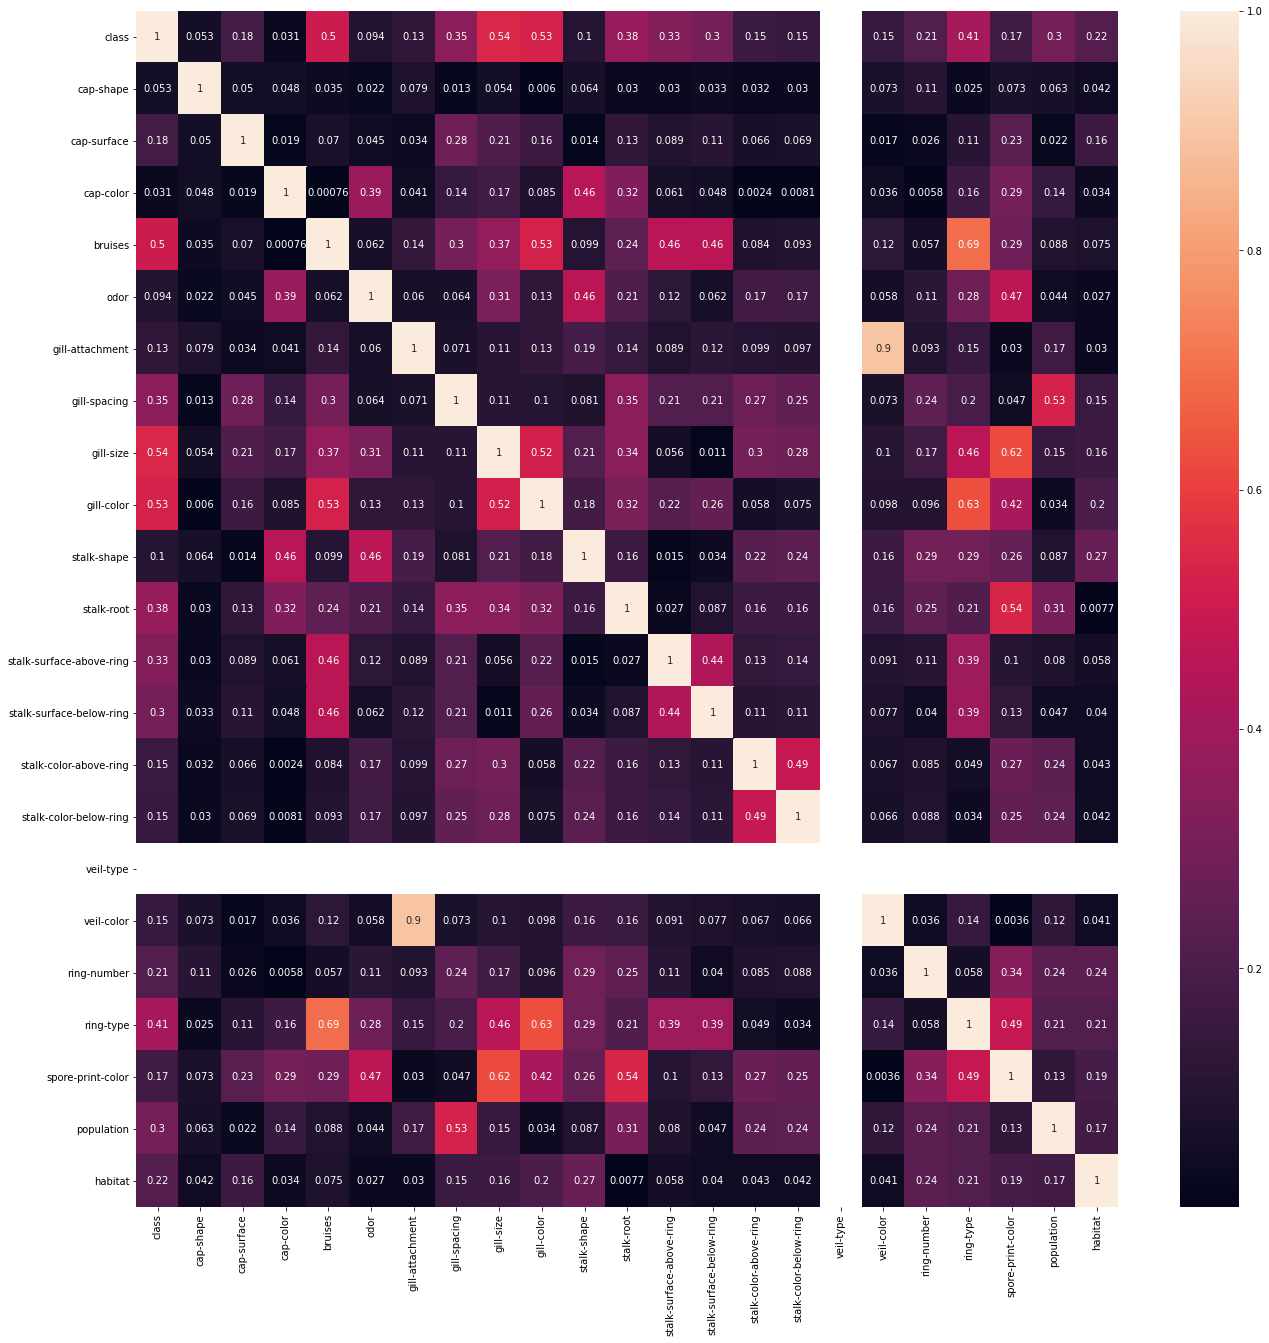

In [25]:
df_corr = df.corr().abs()

plt.figure(figsize=(22,22))
sns.heatmap(df_corr, annot=True, annot_kws = {'size':10})
plt.show

In [26]:
df['veil-type'].value_counts  

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32>

* veil type has all values 0 so we can drop this column

In [27]:
df = df.drop(['veil-type'],axis=1)

In [28]:
df.shape

(8124, 22)

## Model Building

In [29]:
x = df.drop(columns='class') #features
y = df['class'] #lable

In [30]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [31]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [32]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled.shape

(8124, 21)

In [34]:
vif = pd.DataFrame()

vif['vif']=  [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['Features'] = x.columns
vif

,vif,Features
0,1.043031,cap-shape
1,1.254300,cap-surface
2,1.566327,cap-color
3,6.172082,bruises
4,1.839415,odor
5,6.956323,gill-attachment
6,4.107406,gill-spacing
7,3.995689,gill-size
8,2.294605,gill-color
9,4.640069,stalk-shape


### finding best random state

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [36]:
maxAcc = 0
maxRS = 0
for i in range (1,200):
    x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.30,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('best accuracy is ',maxAcc," on random state ",maxRS)


C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

best accuracy is  0.9565599718607105  on random state  5


In [37]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.30,random_state = 5)

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
clf.score(x_train,y_train)

1.0

In [40]:
y_pred = clf.predict(x_test)

accuracy_score(y_test,y_pred)

1.0

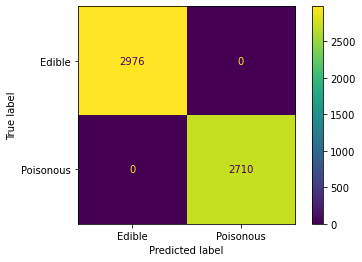

In [41]:
plot_confusion_matrix(clf, x_test, y_test, display_labels=['Edible', 'Poisonous']);

In [42]:
scores = cross_val_score(clf, x_train, y_train, cv=5)

for score in scores:
    print('Accuracy:', round(score,4))

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0


In [43]:
import pickle
filename = 'Mushroom_proj.pkl'
pickle.dump(clf,open (filename,'wb'))